# App param scan gamma dist figure

Changing `b` and `mu`

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

from math import log, floor

import numpy as np
import matplotlib.pyplot as plt

import itertools

from tqdm import tqdm


# from plots2.fns import (
#     get_corner_annotations,
#     get_corner_annotations_custom_labels,
#     # get_corner_annotations_explicit
# )

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist
from poly2.config import Config

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Get sampled dists

In [3]:
cf = Config(
    verbose=False, 
    n_k=300,
)

In [4]:
np.random.seed(0)

In [5]:
bs = np.random.uniform(0, 5, 1000)
mus = np.random.uniform(0, 25, 1000)

In [6]:
df = pd.DataFrame()

tv = trait_vec(cf.n_k)

for ii in tqdm(range(1000)):
    mu = mus[ii]
    b = bs[ii]
    a = mu*b
    
    yy = gamma_dist(cf.n_k, a, b)
    
    yy = yy / (tv[1] - tv[0])
    
    tmp = pd.DataFrame({f'dist_{ii}': yy})
    df = pd.concat([df, tmp], axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 11.91it/s]


# Hists

In [7]:
np.log10(1e-50)

-50.0

In [8]:
bins = np.logspace(-97, 3, 50)

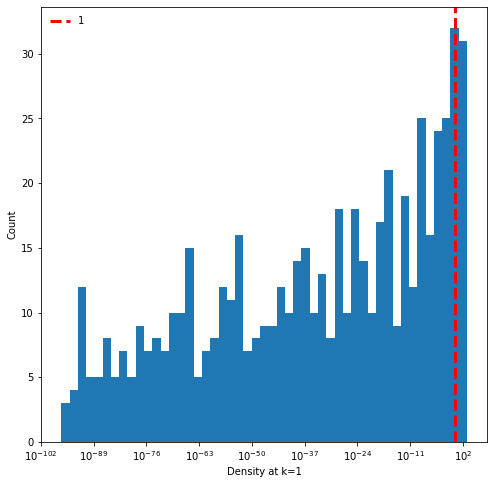

In [9]:
f, ax = plt.subplots(figsize=(8,8))

df.iloc[-1, :].hist(ax=ax, bins=bins)

ax.axvline(1, lw=3, c='r', ls='--', label='1')

ax.set_xlabel('Density at k=1')
ax.set_ylabel('Count')

ax.set_xscale('log')

ax.grid(False)

ax.legend(frameon=False)

In [10]:
# f.savefig('../figures/rough/hist.jpg', dpi=1200, bbox_inches="tight")

In [11]:
df.iloc[0, :].describe()

count    1.000000e+03
mean     2.246782e+02
std      1.151430e+02
min      9.325873e-13
25%      1.542154e+02
50%      2.995931e+02
75%      3.000000e+02
max      3.000000e+02
Name: 0, dtype: float64

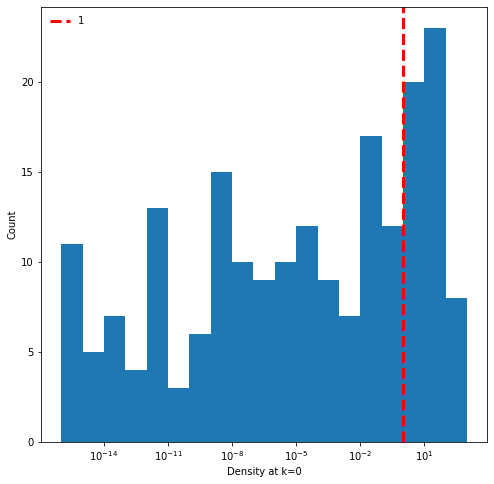

In [12]:
f, ax = plt.subplots(figsize=(8,8))

df.iloc[-1, :].hist(ax=ax, bins=np.logspace(-16, 3, 20))

ax.axvline(1, lw=3, c='r', ls='--', label='1')

ax.set_xlabel('Density at k=0')
ax.set_ylabel('Count')

ax.set_xscale('log')

ax.grid(False)

ax.legend(frameon=False)

In [13]:
# f.savefig('../figures/rough/hist2.jpg', dpi=1200, bbox_inches="tight")

# Main fig

In [14]:
y_d = gamma_dist(cf.n_k, cf.k_mu * cf.k_b , cf.k_b)
y_default = y_d / (tv[1] - tv[0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.75it/s]


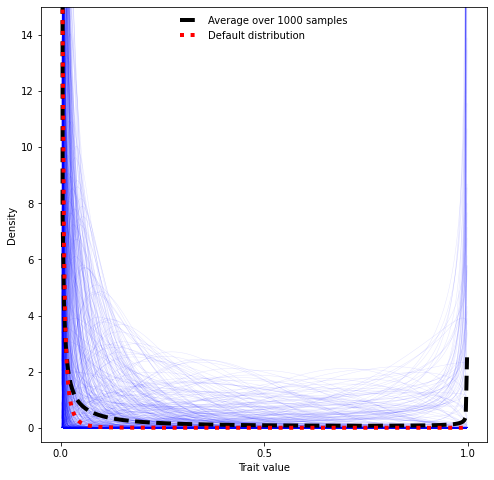

In [15]:
f, ax = plt.subplots(figsize=(8,8))

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

for ii in tqdm(range(1000)):
    ax.plot(tv, df.iloc[:, ii], alpha=0.1, label=None, ls='-', lw=0.5, c='b')


ax.plot(tv, np.mean(df, axis=1), label='Average over 1000 samples', c='k', ls='--', lw=4)

ax.plot(tv, y_default, label='Default distribution', c='r', ls=':', lw=4)


ax.set_ylim([-0.5, 15])

ax.set_xticks([0, 0.5, 1])

ax.set_xlabel('Trait value')
ax.set_ylabel('Density')

ax.legend(frameon=False)

## Save

In [16]:
f.savefig('../figures/paper/app3_fig2.jpg', dpi=1200, bbox_inches="tight")

# Alternative (worse)

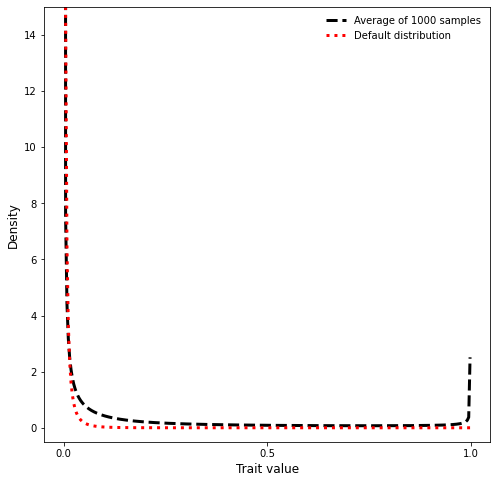

In [17]:
f, ax = plt.subplots(figsize=(8,8))

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

LW = 3

ax.plot(tv, np.mean(df, axis=1), label='Average of 1000 samples', c='k', ls='--', lw=LW)

ax.plot(tv, y_default, label='Default distribution', c='r', ls=':', lw=LW)


ax.set_ylim([-0.5, 15])

ax.set_xticks([0, 0.5, 1])

ax.set_xlabel('Trait value')
ax.set_ylabel('Density')

ax.legend(frameon=False)

In [18]:
# f.savefig('../figures/paper/app1_fig3B.jpg', dpi=1200, bbox_inches="tight")